<a href="https://colab.research.google.com/github/Nckflannery/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/Nick_Flannery_DS_Unit_1_Sprint_Challenge_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

## Loading, cleaning, visualizing, and analyzing data

In this sprint challenge you will look at a dataset of the survival of patients who underwent surgery for breast cancer.

http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 0 - Revert your version of Pandas right from the start
I don't want any of you to get stuck because of Pandas bugs, so right from the get-go revert back to version `0.23.4`
- Run the cell below
- Then restart your runtime. Go to `Runtime`  ->  `Restart runtime...` in the top menu (or click the "RESTART RUNTIME" button that shows up in the output of the cell below).


In [0]:
!pip install pandas==0.23.4

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- Validate that you have no missing values.
- Add informative names to the features.
- The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)

At the end, print the first five rows of the dataset to demonstrate the above.

In [0]:
# Import pandas
import pandas as pd
# Link to data
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data'
# Save data to dataframe df
# Data is missing headers, so create them
headers = ['Patient_Age', 'Year(1900)', 'Positive_Axillary_Nodes', 'Survival']
df = pd.read_csv(url, names=headers)

In [0]:
# Validate that you have no missing values
df.isnull().sum()

Patient_Age                0
Year(1900)                 0
Positive_Axillary_Nodes    0
Survival                   0
dtype: int64

In [0]:
# Convert 2's to 0's
df['Survival'] = df['Survival'].replace(2, 0)

In [0]:
# Look at data to check headers and see that replace worked
df.head(10)

,Patient_Age,Year(1900),Positive_Axillary_Nodes,Survival
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,0
8,34,66,9,0
9,34,58,30,1


## Part 2 - Examine the distribution and relationships of the features

Explore the data - create at least *2* tables (can be summary statistics or crosstabulations) and *2* plots illustrating the nature of the data.

This is open-ended, so to remind - first *complete* this task as a baseline, then go on to the remaining sections, and *then* as time allows revisit and explore further.

Hint - you may need to bin some variables depending on your chosen tables/plots.

In [0]:
# Use .describe to show summary statistics
df.describe()

,Patient_Age,Year(1900),Positive_Axillary_Nodes,Survival
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,0.735294
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,0.000000
25%,44.000000,60.000000,0.000000,0.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,1.000000
max,83.000000,69.000000,52.000000,1.000000


In [0]:
# Make a crosstab Comparing Patient Age to Survival rate
# Make bins to help group the data for crosstabs
age_bins = pd.cut(df['Patient_Age'], bins=10)
nodes_bins = pd.cut(df['Positive_Axillary_Nodes'], bins=10)
year_bins = pd.cut(df['Year(1900)'], bins=15)

In [0]:
# Make some different crosstabs to look at the data
pd.crosstab(age_bins, df['Survival'], normalize='index')
#Not much effect

Survival,0,1
Patient_Age,,
"(29.947, 35.3]",0.125000,0.875000
"(35.3, 40.6]",0.074074,0.925926
"(40.6, 45.9]",0.326087,0.673913
"(45.9, 51.2]",0.301887,0.698113
"(51.2, 56.5]",0.327273,0.672727
"(56.5, 61.8]",0.219512,0.780488
"(61.8, 67.1]",0.292683,0.707317
"(67.1, 72.4]",0.222222,0.777778
"(72.4, 77.7]",0.142857,0.857143


In [0]:
#Shows that as nodes increase, survival decreases
pd.crosstab(nodes_bins, df['Survival'], normalize='index')

Survival,0,1
Positive_Axillary_Nodes,,
"(-0.052, 5.2]",0.194915,0.805085
"(5.2, 10.4]",0.400000,0.600000
"(10.4, 15.6]",0.611111,0.388889
"(15.6, 20.8]",0.500000,0.500000
"(20.8, 26.0]",0.666667,0.333333
"(26.0, 31.2]",0.000000,1.000000
"(31.2, 36.4]",1.000000,0.000000
"(41.6, 46.8]",0.000000,1.000000
"(46.8, 52.0]",1.000000,0.000000


In [0]:
# Shows that as years increase, survival generally trends upwards
year_survival = pd.crosstab(year_bins, df['Survival'], normalize='index')
year_survival

Survival,0,1
Year(1900),,
"(57.989, 58.733]",0.333333,0.666667
"(58.733, 59.467]",0.333333,0.666667
"(59.467, 60.2]",0.142857,0.857143
"(60.933, 61.667]",0.115385,0.884615
"(61.667, 62.4]",0.304348,0.695652
"(62.4, 63.133]",0.266667,0.733333
"(63.867, 64.6]",0.258065,0.741935
"(64.6, 65.333]",0.464286,0.535714
"(65.333, 66.067]",0.214286,0.785714


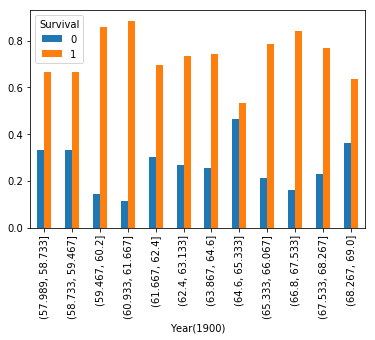

In [0]:
year_survival.plot(kind='bar');

In [0]:
# Let's see if a combination of age and positive nodes shows a trend
age_nodes = pd.crosstab([age_bins, nodes_bins], df['Survival'])
age_nodes

Survival                                   0    1
Patient_Age      Positive_Axillary_Nodes         
(29.947, 47.667] (-0.052, 5.2]            16   65
                 (5.2, 10.4]               4    7
                 (10.4, 15.6]              0    6
                 (15.6, 20.8]              2    2
                 (20.8, 26.0]              3    0
                 (26.0, 31.2]              0    1
                 (46.8, 52.0]              1    0
(47.667, 65.333] (-0.052, 5.2]            22  100
                 (5.2, 10.4]               6   10
                 (10.4, 15.6]             10    0
                 (15.6, 20.8]              2    2
                 (20.8, 26.0]              3    3
                 (26.0, 31.2]              0    1
                 (31.2, 36.4]              1    0
                 (41.6, 46.8]              0    1
(65.333, 83.0]   (-0.052, 5.2]             8   25
                 (5.2, 10.4]               2    1
                 (10.4, 15.6]              1    1

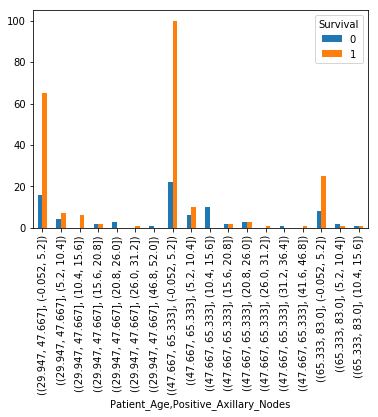

In [0]:
age_nodes.plot(kind='bar');

In [0]:
# Let's see if a combination of age and year shows a trend
age_year = pd.crosstab([age_bins, year_bins], df['Survival'], normalize='index')
age_year

Survival                                0         1
Patient_Age      Year(1900)                        
(29.947, 47.667] (57.989, 60.2]  0.184211  0.815789
                 (60.2, 62.4]    0.181818  0.818182
                 (62.4, 64.6]    0.250000  0.750000
                 (64.6, 66.8]    0.333333  0.666667
                 (66.8, 69.0]    0.312500  0.687500
(47.667, 65.333] (57.989, 60.2]  0.318182  0.681818
                 (60.2, 62.4]    0.205882  0.794118
                 (62.4, 64.6]    0.225806  0.774194
                 (64.6, 66.8]    0.379310  0.620690
                 (66.8, 69.0]    0.217391  0.782609
(65.333, 83.0]   (57.989, 60.2]  0.444444  0.555556
                 (60.2, 62.4]    0.250000  0.750000
                 (62.4, 64.6]    0.500000  0.500000
                 (64.6, 66.8]    0.222222  0.777778
                 (66.8, 69.0]    0.100000  0.900000

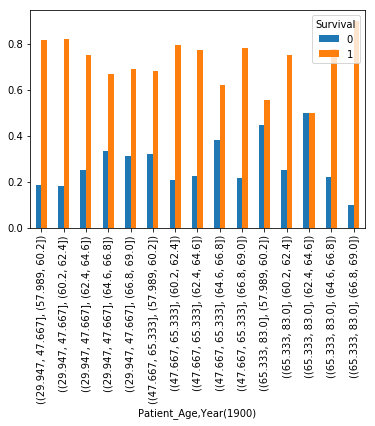

In [0]:
age_year.plot(kind='bar');
#It looks as though as the years progress, survival rate drops
#But there are just less datapoints so it is not true

#It looks like 62-64 were just bad years

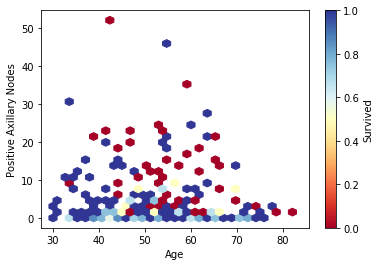

In [0]:
# Not seeing many trends, let's look at the data a different way
import matplotlib.pyplot as plt
plt.hexbin(df['Patient_Age'], df['Positive_Axillary_Nodes'], df['Survival'], cmap='RdYlBu', gridsize=30)
color = plt.colorbar()
color.set_label('Survived')
plt.xlabel('Age')
plt.ylabel('Positive Axillary Nodes');

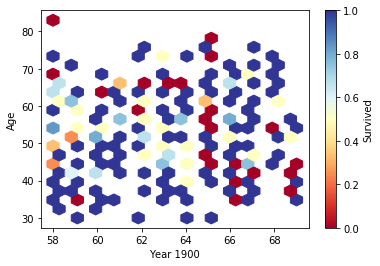

In [0]:
plt.hexbin(df['Year(1900)'], df['Patient_Age'], df['Survival'], cmap='RdYlBu', gridsize=20)
color = plt.colorbar()
color.set_label('Survived')
plt.xlabel('Year 1900')
plt.ylabel('Age');

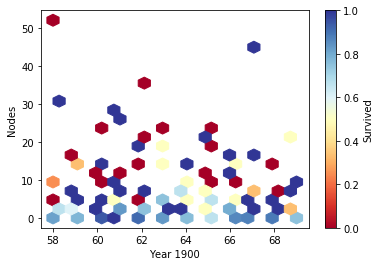

In [0]:
plt.hexbin(df['Year(1900)'], df['Positive_Axillary_Nodes'], df['Survival'], cmap='RdYlBu', gridsize=20)
color = plt.colorbar()
color.set_label('Survived')
plt.xlabel('Year 1900')
plt.ylabel('Nodes');

In [0]:
# It's somewhat weak but it looks like the highest survival rates are with the
# lowest number of Positive Axillary Nodes

## Part 3 - DataFrame Filtering

Use DataFrame filtering to subset the data into two smaller dataframes. You should make one dataframe for individuals who survived >5 years and a second dataframe for individuals who did not. 

Create a graph with each of the dataframes (can be the same graph type) to show the differences in Age and Number of Positive Axillary Nodes Detected between the two groups.

In [0]:
# Create dataframe for items where Survival is 1
df_survived = df[df['Survival']==1]

In [0]:
df_survived.head()

,Patient_Age,Year(1900),Positive_Axillary_Nodes,Survival
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [0]:
# Create dataframe for items where Survival is 0
df_yikes = df[df['Survival']==0]

In [0]:
df_yikes.head()

,Patient_Age,Year(1900),Positive_Axillary_Nodes,Survival
7,34,59,0,0
8,34,66,9,0
24,38,69,21,0
34,39,66,0,0
43,41,60,23,0


In [0]:
# Create bins for survived
surv_age_bin = pd.cut(df_survived['Patient_Age'], bins=3)
surv_node_bin = pd.cut(df_survived['Positive_Axillary_Nodes'], bins=4)

In [0]:
# Crosstab node and age bins for survived to graph
crosstab_survived = pd.crosstab(surv_node_bin, surv_age_bin)

In [0]:
# Create bins for yikes
yikes_age_bin = pd.cut(df_yikes['Patient_Age'], bins=3)
yikes_node_bin = pd.cut(df_yikes['Positive_Axillary_Nodes'], bins=4)

In [0]:
# Crosstab node and age bins for yikes to graph
crosstab_yikes = pd.crosstab(yikes_node_bin, yikes_age_bin)

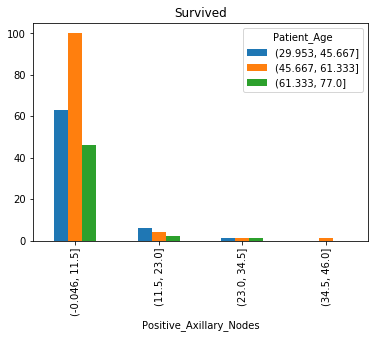

In [0]:
crosstab_survived.plot(kind='bar', title='Survived');

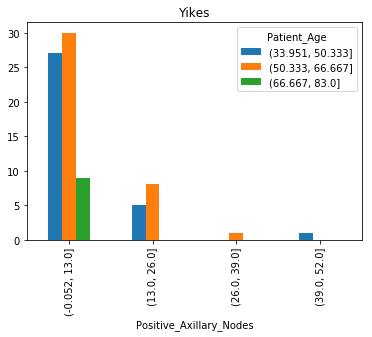

In [0]:
crosstab_yikes.plot(kind='bar', title='Yikes');

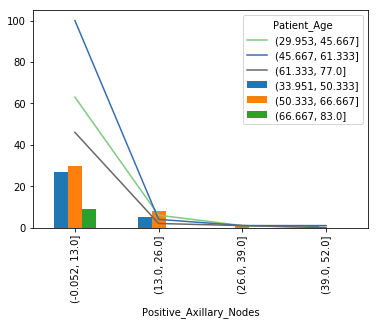

In [0]:
ax = crosstab_survived.plot(colormap='Accent')
crosstab_yikes.plot(ax=ax, kind='bar');

In [0]:
#From these graphs it looks like Age and Nodes doesn't have MUCH influence on 
#Survival rate 
# However, we can see that the survival rate is much higher for lower node levels

## Part 4 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- What is at least one feature that looks to have a positive relationship with survival? (As that feature goes up in value rate of survival increases)
- What is at least one feature that looks to have a negative relationship with survival? (As that feature goes down in value rate of survival increases)
- How are those two features related with each other, and what might that mean?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

1. While it is slight, the year feature tends to have a positive relationship with survival.

2. One feature that has a negative relationship with survival is Positive Axillary Nodes. The more present, the lower the survival rate.

3. 

In [0]:
# Any Supplemental Code for Analysis Here